# Extrapolating a known odds ratio back to time zero

This document shows how to extrapolate a probability back to time zero using a reference data point. The main example uses a probability at time one hour from the Emberson meta-analysis.

The important results from this example are:

| Occlusion type | mRS<=1 Probability at time=0 |
| --- | --- |
| nLVO | 0.6416 |
| LVO | 0.2329 |

## Plain English summary

We want to find information about the modified Rankin Scale (mRS) distribution for a population of patients treated with intravenous thrombolysis (IVT) at zero minutes after their stroke began. This data does not exist in real life because realistically nobody can be treated that quickly. Instead we have to use the available data and fit a model to it to find a formula for changing probability with time. Then we can plug time zero into this formula to find the probability at time zero.

The available data is from a meta-analysis of thrombolysis by Emberson et al. 2014. They provide:
+ The odds ratio of a good outcome (mRS$\leq$1) with thrombolysis at a treatment time of one hour.
+ The odds ratio of a good outcome (mRS$\leq$1) with thrombolysis at the time of no effect, 6.3 hours.
+ The fact that plotting log-odds against time gives a straight line graph.

We can take their data at times of 1 hour and 6.3 hours and recreate the straight-line fit to these points. By continuing to draw the straight line back to time zero, we can define the odds ratio of a good outcome at that time.

We then combine that result with the mRS probability distribution that we previously derived for thrombolysis at the time-of-no-effect __TO DO: add link__. This allows us to define a probability of a good outcome for treatment at time zero.

## Limitations

The exact results from this example are only valid when mRS$\leq$1. This is because the reference data is for only the mRS$\leq$1 group.

## Method

To set up the extrapolation generally, we will do the following steps:

+ Gather the odds ratio with time data from Emberson et al. 2014
+ Recreate the straight line fit in the form $\log(\mathrm{odds\ ratio}) = a + bt$
+ Define the log(odds ratio) at time zero
+ Convert this to a formula for probability at time zero

To convert the new log(odds ratio) to probability at our chosen start time of zero hours, we have to provide an already-known probability at the time-of-no-effect.

![Summary image for calculating change decay over time. 1. Get reference data points. Take two odds ratio points from this chart and convert them to log(odds ratio), where “log” means “natural log”. 2. Straight line fit. Connect the two “log(odds ratio)” and time points with a straight line. The slope of the line is: b = -0.1211… The line hits time zero at a log(odds ratio) value: a= 0.76296. 3. Convert to probability. If we use a reference probability value, then we can calibrate the straight line fit and use it to calculate a probability of mRS <= 1 at any time. For a reference point at the no-effect time tne, the probability at time zero is given by a formula. 4. Usage. This straight line fit applies to mRS <= 1 data only. The same value of a can be used to fit the decay with time for: nLVO and LVO patients combined; nLVO patients only; LVO patients only.](./images/data_sources_decay.png)

## Notebook admin

In [1]:
# Keep notebook cleaner once finalised
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set up MatPlotLib
%matplotlib inline
# Change default colour scheme:
plt.style.use('seaborn-colorblind')

## Gather data 

We're mainly using the plot of odds ratio with time from Emberson et al. 2014 (their Figure 1):

> ![](../images/emberson-et-al-2014_figure-1_odds-ratio-with-time.png)

> n.b. The y-axis is definitely "odds ratio". The dark blue line was calculated using "log(odds ratio)" and then transformed to "odds ratio" for the graph. 

We can define a few points from this figure:

+ The time-of-no-effect $t_{\mathrm{ne}} = 6.3\mathrm{hr}$ (marked with white square). 
+ The odds ratio $OR(\mathrm{mRS}\leq 1\ |\ t=t_{\mathrm{ne}}) = 1.0$ (marked with white square). 
+ The odds ratio $OR(\mathrm{mRS}\leq 1\ |\ t=1\mathrm{hr}) \sim 1.9$ (intersection of the main dark blue line with the y-axis).

In [4]:
t_ne = 6.3  # hours
OR_mRSleq1_tne = 1.0
OR_mRSleq1_t1 = 1.9

### Plot the available data

We'll plot the data in terms of log(odds ratio) and draw a straight line connecting the points. This will match the data behind the main dark blue line in Figure 1 from Emberson et al. 2014.

Define x and y coordinates for the t=1hr and t=t_ne points:

In [5]:
x_t1 = 1                         # hours
y_t1 = np.log(OR_mRSleq1_t1)     # from the data

x_tne = t_ne                      # hours
y_tne = 0                         # by definition, log(1)=0

Define some coordinates of the straight line connecting these two points:

In [6]:
# Find the step from the t=1 point to the t_ne point:
x_step = x_tne - x_t1
y_step = y_tne - y_t1

# Starting from the t=1hr point, step forwards and backwards in t:
x_line = [x_t1 - x_step, x_t1 + x_step]
y_line = [y_t1 - y_step, y_t1 + y_step]

Plot the data:

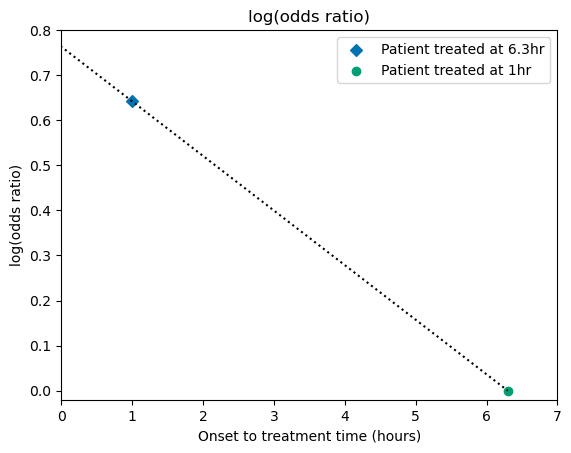

In [7]:
# Mark these two data points:
plt.scatter(x_t1, y_t1, label='Patient treated at 6.3hr', marker='D')
plt.scatter(x_tne, y_tne, label='Patient treated at 1hr', marker='o')

# Draw a straight line passing through the two points:
plt.plot(x_line, y_line, linestyle=':',color='k')

# Ọther plot setup:
plt.ylabel('log(odds ratio)')
plt.xlabel('Onset to treatment time (hours)')
plt.xlim(0, 7)
plt.ylim(-0.02, 0.8)
plt.legend()
plt.title('log(odds ratio)')
plt.show()

## Define a straight line model for log(odds ratio)

Here, we want to define log(OR) for mRS$\leq$1 at $t=0$. We can connect the two known points with a straight line, $\log(OR)=a+bt$, and then continue the line backwards in time to $t=0$. 

At $t=t_{\mathrm{ne}}$, we know that $\log\bigl[OR(\mathrm{mRS}\ |\ t=t_{\mathrm{ne}})\bigr] = 0 $ and so

$$ a+b \cdot t_{\mathrm{ne}} = 0 $$

$$ b  = -\frac{a}{t_{\mathrm{ne}}} $$

Then for a generic $t$, we use this $b$ with $a + b t = \log(OR) $ to find $a$. 

$$ 
\begin{align*}
a -\frac{a\cdot t}{t_{\mathrm{ne}}} & = \log(OR) \\
a\left(1 - \frac{t}{t_{\mathrm{ne}}}\right) & = \log(OR) \\
\end{align*}
$$


$$ a = \frac{\log(OR)}{1 - \frac{t}{t_{\mathrm{ne}}}} $$

At $t=1\,$hr,

$$ a = \frac{\log(1.9)}{1 - \frac{1\,\mathrm{hr}}{6.3\,\mathrm{hr}}} $$

This contains only known values and so we can calculate $a$.

> Note that the units of $t$ and $t_{\mathrm{ne}}$ _must_ match here. In the equations above, we have used hours. If we had to use minutes instead, we would use:
$$ a = \frac{\log(1.9)}{1 - \frac{60\,\mathrm{minutes}}{6.3\times60\,\mathrm{minutes}}} $$ 

## Extrapolate to t=0

Now that we've defined $a$ and $b$, we can use the same straight line equation to find the log(odds ratio) at $t=0$.

At $t=0$, the straight line $a+bt = a +0 = a $ and so:

$$ \log\bigl[OR(\mathrm{mRS}\leq1\ |\ t=0\,\mathrm{hr})\bigr] = a $$

Calculate $a$ using time in hours:

In [8]:
a = (
    np.log(OR_mRSleq1_t1) /
    (1.0 - (1.0/t_ne))
)

a

0.7629583929973748

### Plot the new value

We can compare the newly-calculated log(OR) value with the plot from before:

In [9]:
# Define x and y coordinates of the t=0 point:
x_t0 = 0
y_t0 = a

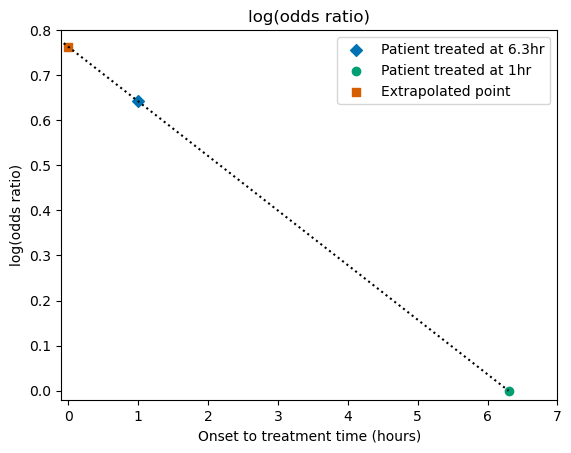

In [10]:
# Mark the data points:
plt.scatter(x_t1, y_t1, label='Patient treated at 6.3hr', marker='D')
plt.scatter(x_tne, y_tne, label='Patient treated at 1hr', marker='o')
plt.scatter(x_t0, y_t0, label='Extrapolated point', marker='s')

# Draw a straight line connecting the points:
plt.plot(x_line, y_line, linestyle=':', color='k')

# Ọther plot setup:
plt.ylabel('log(odds ratio)')
plt.xlabel('Onset to treatment time (hours)')
plt.xlim(-0.1, 7)
plt.ylim(-0.02, 0.8)
plt.legend()
plt.title('log(odds ratio)')

plt.savefig('./images/extrapolate-emberson-fig1.jpg', dpi=300, bbox_inches='tight')
plt.show()

## Convert this log(OR) to probability

We can use the new value of log(odds ratio) at $t=0$ to define a probability at $t=0$, assuming that we already know a probability at the time-of-no-effect, $P(\mathrm{mRS}\leq x\ |\ t_{\mathrm{ne}})$. 

By definition, the odds ratio:

$$ OR(\mathrm{mRS},x,t) = \left\{ \frac{P(\mathrm{mRS}\leq x\ |\ t)}{P(\mathrm{mRS}>x\ |\ t)} \right\} \div \left\{ \frac{P(\mathrm{mRS}\leq x\ |\ t_{\mathrm{ne}})}{P(\mathrm{mRS}>x\ |\ t_{\mathrm{ne}})} \right\} $$

Filling in the unknowns and rearranging:

$$ \frac{P(\mathrm{mRS}\leq 1\ |\ t=0)}{P(\mathrm{mRS}>1\ |\ t=0)}  = OR(\mathrm{mRS}\leq1,t=0) \cdot \left\{ \frac{P(\mathrm{mRS}\leq 1\ |\ t_{\mathrm{ne}})}{P(\mathrm{mRS}>1\ |\ t_{\mathrm{ne}})} \right\} $$

To rearrange this equation to find probability, we'll set $P=P(\mathrm{mRS}\leq 1\ |\ t=0)$ and set the entire right-hand-side of the equation to a new constant $R$:

$$
\begin{align*}
\frac{P}{1 - P}  & = R \\
P & = R(1-P) \\
P + (P\cdot R) & = R \\
P(1 + R) & = R \\
P & = \frac{R}{1 + R} \\
\end{align*}
$$

This is ugly to write out in full, so we define $P_R = P(\mathrm{mRS}\leq 1\ |\ t_{\mathrm{ne}})$ and use $\log\bigl[OR(\mathrm{mRS}\leq1\ |\ t=0\,\mathrm{hr})\bigr] = a$ from before so that:

$$ P(\mathrm{mRS}\leq 1\ |\ t=0) = \frac{e^{a} \cdot \left\{ \frac{P_{R}}{1 - P_{R}} \right\}}{1 + e^{a} \cdot \left\{ \frac{P_{R}}{1 - P_{R}} \right\}} $$

## Calculate the probability at time zero

We can take probabilities of mRS<=1 at the time-of-no-effect from the derived mRS distribution.  __TO DO - put link here__

+ $P(\mathrm{mRS}\leq 1\ |\ t_{\mathrm{ne}} \ |\ \mathrm{nLVO}) = 0.455$ 
+ $P(\mathrm{mRS}\leq 1\ |\ t_{\mathrm{ne}} \ |\ \mathrm{LVO}) = 0.124$

In [11]:
# Probability of mRS<=1 at t=t_ne (a.k.a. probability P_R):
p_mRSleq1_tne_nlvo = 0.455
p_mRSleq1_tne_lvo = 0.124

For each probability, we calculate $R$ and then $P(\mathrm{mRS}\leq 1\ |\ t=0)$.

In [12]:
R = np.exp(a) * p_mRSleq1_tne_nlvo / (1 - p_mRSleq1_tne_nlvo)
p_mRSleq1_t0_nlvo = R / (1 + R)

In [13]:
R = np.exp(a) * p_mRSleq1_tne_lvo / (1 - p_mRSleq1_tne_lvo)
p_mRSleq1_t0_lvo = R / (1 + R)

## Results

In [14]:
print(f'nLVO mRS<=1 Probability at time=0: {p_mRSleq1_t0_nlvo:7.4f}')
print(f'LVO  mRS<=1 Probability at time=0: {p_mRSleq1_t0_lvo:7.4f}')

nLVO mRS<=1 Probability at time=0:  0.6416
LVO  mRS<=1 Probability at time=0:  0.2329


# General extrapolation

The previous sections gave results that were specific to the data from Emberson et al. 2014. The following sections redo the formulae for any general case.

> This section isn't essential for following the examples above. 

In the current example we have chosen the reference data points at times $t=1$hr and $t=t_{\mathrm{ne}}$, but generally any two times $t=t_1$ and $t=t_2$ could be used so long as we know the following: 

For $t_1$:
+ the time $t_1$, and
+ odds ratio $OR(t=t_1)$.

For $t_2$:
+ the time $t_2$, 
+ odds ratio $OR(t=t_2)$, and
+ probability $P(t=t_2)$ for the conversion.

This is most convenient for $t_2=t_{\mathrm{ne}}$ because we know that $OR(t=t_{\mathrm{ne}})=1$ by definition. Also, $t_1$ can be bigger or smaller than $t_2$. By defining a straight line for log(odds ratio) in the form $a+bt$ we can extrapolate to find the log(odds ratio) at any $t$, not just for $t=0$.

> Important: Make sure the two odds ratios are defined in the same way. Are both using the same baseline at $t=t_\mathrm{ne}$? 

### Find $a$


To find $a$ for two generic data points at times $t_1$ and $t_2$, we write the log(odds ratio) for each:

$$ a + b t_1 = \log(OR_1) $$

$$ a + b t_2 = \log(OR_2) $$

We can combine these by isolating $b$ in each case:

$$ b = \frac{\log(OR_2) - a}{t_2} = \frac{\log(OR_1) - a}{t_1}  $$

And then rearrange to find $a$:

$$
\begin{align*}
t_1 \log(OR_2) - t_1 a & = t_2 \log(OR_1) - t_2 a  \\ \\ 
t_2 a - t_1 a & = t_2 \log(OR_1) - t_1 \log(OR_2) \\ \\
a (t_2 - t_1) & = t_2 \log(OR_1) - t_1 \log(OR_2) \\ \\
a & = \frac{t_2 \log(OR_1) - t_1 \log(OR_2)}{t_2 - t_1} \\
\end{align*}
$$

To put this into the same form as Equation 3, the $a$ defined for $t=t_\mathrm{ne}$, we multiply the right hand side by $\left(\frac{1}{t_2} \div \frac{1}{t_2}\right)$ which is equal to 1:

$$ a = \frac{\log(OR_1) - \frac{t_1}{t_2} \log(OR_2)}{1 - \frac{t_1}{t_2}} $$

When $t_2=t_\mathrm{ne}$, then $\log(OR_2)=0$ by definition and the formula for $a$ matches Equation 3.

### Find $b$

It is straightforward to find $b$ given two values of log(odds ratio) at two times when we know that the two points are connected by a straight line. 

By definition, the gradient $m$ of a straight line $y=m\cdot x+c$ between two coordinates $(x_1, y_1)$ and $(x_2, y_2)$ is:

$$ m = \frac{y_2 - y_1}{x_2 - x_1} $$

So for our straight line of $\log(OR) = a+bt$ with two coordinates $(t_1, \log[OR_1])$ and $(t_2, \log[OR_2])$, we find the gradient:

$$ b = \frac{\log(OR_2) - \log(OR_1)}{t_2 - t_1} $$

## General function

We have combined the steps above into a function `extrapolate_odds_ratio()` that is stored in the `outcome_utilities` module. The function takes the known times, odds ratios and probabilities, and extrapolates the straight line of log(odds ratio) to a given time $t_e$. It returns the probability and odds ratio at $t_e$ and the constants $a$ and $b$ that make the straight line. 

In [15]:
from stroke_outcome.outcome_utilities import extrapolate_odds_ratio

In [16]:
extrapolate_odds_ratio??

Signature:
extrapolate_odds_ratio(
    t_1: float,
    OR_1: float,
    t_2: float,
    OR_2: float,
    p_2: float,
    t_e: float = 0,
)
Source:   
def extrapolate_odds_ratio(
        t_1: float,
        OR_1: float,
        t_2: float,
        OR_2: float,
        p_2: float,
        t_e: float = 0
        ):
    """
    Use two odds ratios to extrapolate the straight line fit and find
    the odds ratio at a given time, then convert to probability.

    The three time parameters MUST use the same units, e.g. hours.

    Inputs:
    t_1, t_2   - float. Times for data points 1 and 2.
    OR_1, OR_2 - float. Odds ratios at times t_1 and t_2.
    p_2        - float. Probability at time t_2.
    t_e        - float. Time to extrapolate the line to.

    Returns:
    OR_e - float. Extrapolated odds ratio at time t_e.
    p_e  - float. Extrapolated probability at time t_e.
    a, b - float. Constants for the straight line fit a+bt.
    """
    # Calculate "a", the log(odds ratio) at time t

$\phantom{gap}$

Check that this gives the same results as we found earlier in the notebook for the nLVO data:

In [17]:
OR_0, p_0, a_0, b_0 = extrapolate_odds_ratio(
    t_1=1, OR_1=1.9,                             # t=1hr data
    t_2=t_ne, OR_2=1, p_2=p_mRSleq1_tne_nlvo,    # t=t_ne data 
    t_e=0                                 # Extrapolate to this time.
)

Define the gradient of the straight line we plotted initially, before calculating $b$:

In [18]:
gradient = y_step / x_step

In [19]:
print('  | From function | From notebook |')
print(f'P |    {p_0:7.4f}    |    {p_mRSleq1_t0_nlvo:7.4f}    |')
print(f'a |    {a_0:7.4f}    |    {a:7.4f}    |')
print(f'b |    {b_0:7.4f}    |    {gradient:7.4f}    |')

  | From function | From notebook |
P |     0.6416    |     0.6416    |
a |     0.7630    |     0.7630    |
b |    -0.1211    |    -0.1211    |


## References

Emberson J, Lees KR, Lyden P, et al. _Effect of treatment delay, age, and stroke severity on the effects of intravenous thrombolysis with alteplase for acute ischaemic stroke: A meta-analysis of individual patient data from randomised trials_. The Lancet 2014;384:1929–35. doi:10.1016/S0140-6736(14)60584-5